# Labolatorium 11 Generatory Liczb Losowych
### Autor: Krzysztof Hardek

In [128]:
import numpy as np
import random
from matplotlib import pyplot as plt
from scipy import special
from scipy.stats import norm, shapiro

## Zad 1 Testowanie generatorów liczb losowych
Funkcje pomocnicze do wygenerowania n liczb za pomocą różnych generatorów

In [129]:
def mt_gen(n):
    return [random.random() for _ in range(n)]


def pcg_gen(n):
    generator = np.random.default_rng()
    
    return [generator.random() for _ in range(n)]


def get_distribution(interval_count, number_list):
    distribution = np.zeros(interval_count)
    
    for number in number_list:
        distribution[int(np.floor(number * 10))] += 1
        
    return distribution

### Wizualizacja na wykresie rozkładu liczb w 10 równych przedziałach
Funkcja pomocnicza

In [130]:
def visualize(n):
    interval_count = 10
    
    mt_number_list = mt_gen(n)
    mt_distribution = get_distribution(interval_count, mt_number_list)

    plt.scatter(range(interval_count), mt_distribution, color='c')
    plt.xlabel('interval index')
    plt.ylabel('distribution')
    plt.title('Mersenne Twister')
    plt.show()
    
    
    pcg_number_list = pcg_gen(n)
    pcg_distribution = get_distribution(interval_count, pcg_number_list)

    plt.scatter(range(interval_count), pcg_distribution, color='y')
    plt.xlabel('interval index')
    plt.ylabel('distribution')
    plt.title('PCG64')
    plt.show()
    

n = 10

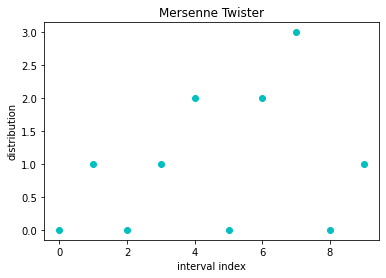

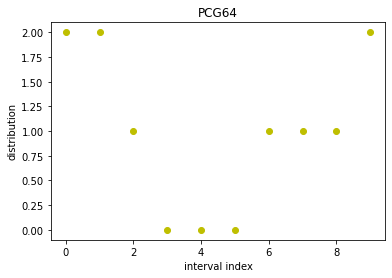

In [131]:
visualize(10)

n = 1000

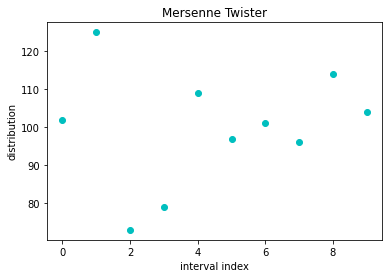

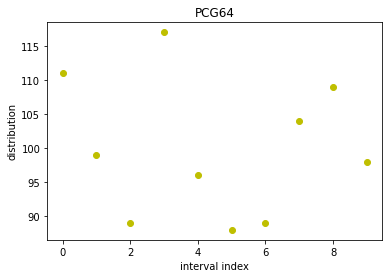

In [132]:
visualize(1000)

n = 5000

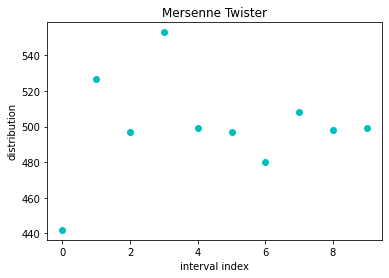

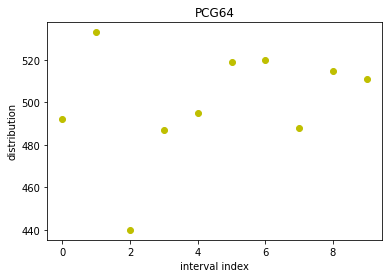

In [133]:
visualize(5000)

#### Wnioski
Widać że przy zwiększaniu rozmiaru tablicy liczb różnica pomiędzy największą a najmniejszą wartością dystrybucji zwiększa się mniejsza ilość razy, czyli rozkład staje się coraz bardziej jednostajny.

### Sprawdzenie dla ilu liczb zachodzi $ x_i < x_{i+1} $ 
Funkcja pomocnicza

In [136]:
def test_count(n):
    mt_number_list = mt_gen(n)
    mt_distribution = get_distribution(10, mt_number_list)

    mt_prev_number = None
    mt_count = 0
    
    for mt_number in mt_number_list:
        if mt_prev_number and mt_prev_number < mt_number:
            mt_count += 1
        
        mt_prev_number = mt_number
    
    pcg_number_list = pcg_gen(n)
    pcg_distribution = get_distribution(10, pcg_number_list)

    pcg_prev_number = None
    pcg_count = 0
    
    for pcg_number in pcg_number_list:
        if pcg_prev_number and pcg_prev_number < pcg_number:
            pcg_count += 1
        
        pcg_prev_number = pcg_number
        
    return mt_count, pcg_count

n = 10

In [137]:
print(test_count(10))

(6, 4)


n = 1000

In [138]:
print(test_count(1000))

(505, 500)


n = 5000

In [139]:
print(test_count(5000))

(2508, 2506)


#### Wnioski
Liczb takich powinno być około połowy i widać, że uzyskane wartości oscylują wokół tego.

### Jeden z testów z artykułu 
Wybrałem test Frequency (Monobit) Test

In [140]:
def freq_test(n):
    mt_number = random.getrandbits(n)
    pcg_number = random.getrandbits(n)
    
    mt_sum = 0
    pcg_sum = 0
    
    for _ in range(n):
        mt_sum += 2 * (mt_number % 2) - 1
        mt_number //= 2
        
        pcg_sum += 2 * (pcg_number % 2) - 1
        pcg_number //= 2
    
    
    mt_s_obs = abs(mt_sum) / (n ** (0.5))
    mt_p_value = special.erfc(mt_s_obs / (2 ** (0.5)))
    
    pcg_s_obs = abs(pcg_sum) / (n ** (0.5))
    pcg_p_value = special.erfc(pcg_s_obs / (2 ** (0.5)))
    
    return mt_p_value >= 0.01, pcg_p_value >= 0.01


#### Testowanie
Generuje losową liczbę bitów, więc dla n liczb wygeneruje n * 64 bity

n = 10

In [141]:
print(freq_test(10 * 64))

(True, True)


n = 1000

In [142]:
print(freq_test(1000 * 64))

(True, True)


n = 5000

In [143]:
print(freq_test(5000 * 64))

(True, True)


#### Wnioski
Obydwa generatory przechodzą wszystkie testy, czyli można je uznać za generatory liczb losowych.

## Zad 2 Generowanie liczb z rozkładu normalnego
Funkcje pomocnicze

In [146]:
def box_muller(mu, sigma):
    u1 = random.random()
    u2 = random.random()
    
    while u1 == 0 or u2 == 0:
        u1 = random.random()
        u2 = random.random()
    
    z = ((-2 * np.log(u1)) ** 0.5) * np.cos(2 * np.pi * u2)
    
    return z * sigma + mu 


def visualize2(n, mu, sigma):
    data = [box_muller(mu, sigma) for _ in range(n)]
    plt.hist(data, bins=10, density=True, alpha=0.6, color='r')
    
    x =  np.linspace(-5*sigma, 5*sigma, 100)
    plt.plot(x, norm.pdf(x, mu, sigma))
    
    plt.show()

### Wizualizacja na wykresie
n = 10

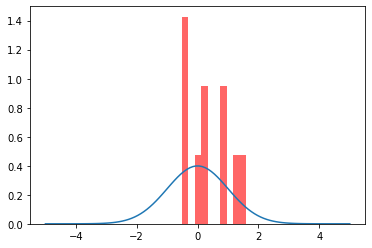

In [147]:
visualize2(10, 0, 1)

n = 100

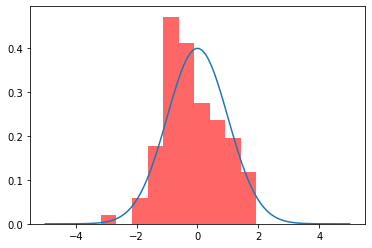

In [148]:
visualize2(100, 0, 1)

n = 5000

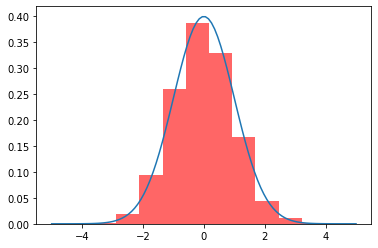

In [149]:
visualize2(5000, 0, 1)

#### Wnioski
Widać że wraz ze wzrostem rozmiaru próbki kształt histogramu przybliża się do kształtu krzywej gęstości prawdopodobieństwa. Liczby rozkładają sie w oczekiwany sposób.

### Test Shapiro-Wilka
n = 10

In [150]:
data10 = [box_muller(0, 1) for _ in range(10)]
print(shapiro(data10)[1])

0.16603803634643555


n = 100

In [151]:
data100 = [box_muller(0, 1) for _ in range(100)]
print(shapiro(data100)[1])

0.26901930570602417


n = 5000

In [152]:
data5000 = [box_muller(0, 1) for _ in range(5000)]
print(shapiro(data5000)[1])

0.2962731122970581


### Wnioski
Jak widać generowanie liczb z rozkładu normalnego za pomocą metody Boksa-Mullera przechodzi test Shapiro-Wilka (p_value > a = 0.05) nawet dla małych rozmiarów próbek. W związku z tym są podstawy do stwierdzenia, że wylosowane liczby pochodzą z rozkładu normalnego.

## Zad 3 Metoda Monte Carlo

In [153]:
def monte_carlo(n):
    points = [(random.uniform(-1, 1), random.uniform(-1, 1)) for _ in range(n)]
    points_in_circle = []
    points_out_circle = []
    pi_errors = []
    
    k = 0
    
    for point in points:
        if point[0] ** 2 + point[1] ** 2 <= 1:
            k += 1
            points_in_circle.append(point)
        else:
            points_out_circle.append(point)
        
        pi_errors.append(abs(np.pi - k/n))
            
    plt.scatter(*zip(*points_in_circle), color='c', s=0.3)
    plt.scatter(*zip(*points_out_circle), color='r', s=0.3)
    plt.title('Circle approximation')
    plt.show()
                         
    plt.plot(range(1, n+1), pi_errors, color='g')
    plt.xlabel('point count')
    plt.ylabel('error')
    plt.title('Absolute error')
    plt.show()
    
    return 4 * k/n


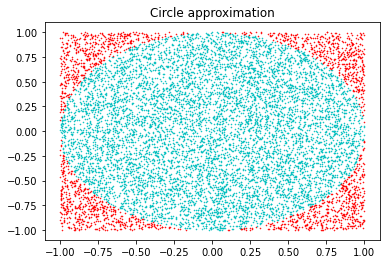

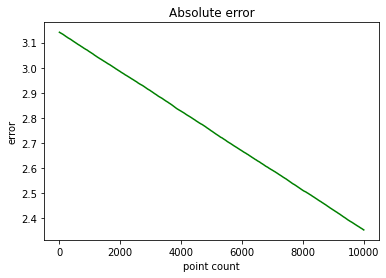

3.1508

In [154]:
monte_carlo(10000)

### Wnioski
Metoda Monte Carlo daje dobre przybliżenie dla odpowieniej liczby punktów. Wraz z rosnącą liczbą punktów błąd bezwzględny maleje liniowo.